# REGRESION LINEAL POLINOMIAL

Regresion Lineal Polinomial usando el descenso del gradiente, implementación de cero e implementación usando scikit-learn

In [1]:
#Librerias 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df = pd.read_csv("Tarea_RegresionPolinomial.csv")

X = df["X"].values
y = df["y"].values


In [3]:
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std


In [4]:
X_poly = np.column_stack((X_norm, X_norm**2))


In [5]:
b0 = 0.0
b1 = 0.0
b2 = 0.0

alpha = 1e-3
epochs = 5000
n = len(y)

losses = []

for i in range(epochs):
    y_hat = b0 + b1*X_poly[:,0] + b2*X_poly[:,1]
    error = y_hat - y

    loss = np.mean(error**2)
    losses.append(loss)

    db0 = (2/n) * np.sum(error)
    db1 = (2/n) * np.sum(error * X_poly[:,0])
    db2 = (2/n) * np.sum(error * X_poly[:,1])

    b0 -= alpha * db0
    b1 -= alpha * db1
    b2 -= alpha * db2

print("Descenso de gradiente polinomial (desde cero):")
print("b0 =", b0)
print("b1 =", b1)
print("b2 =", b2)


Descenso de gradiente polinomial (desde cero):
b0 = 0.11811777977403289
b1 = -0.08852584444092174
b2 = -0.14820237405864808


In [6]:
y_pred_gd_poly = b0 + b1*X_poly[:,0] + b2*X_poly[:,1]

mse_gd = mean_squared_error(y, y_pred_gd_poly)
mae_gd = mean_absolute_error(y, y_pred_gd_poly)

print("MSE GD:", mse_gd)
print("MAE GD:", mae_gd)


MSE GD: 0.5287128175510811
MAE GD: 0.605218271624573


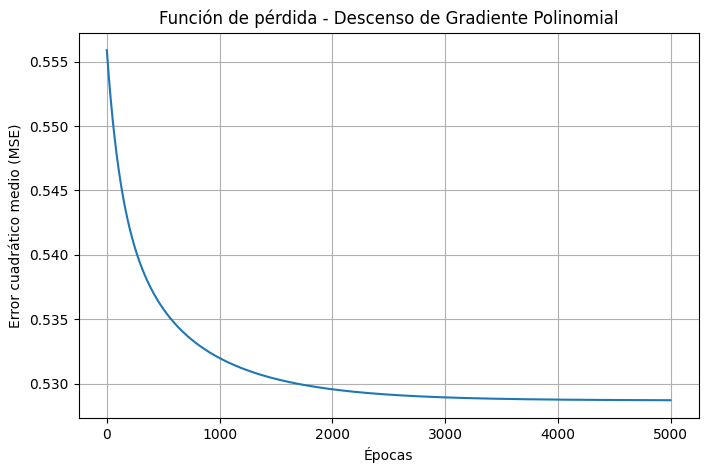

In [7]:
plt.figure(figsize=(8,5))
plt.plot(losses)
plt.xlabel("Épocas")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Función de pérdida - Descenso de Gradiente Polinomial")
plt.grid(True)
plt.show()


La función de pérdida disminuye conforme avanzan las épocas

Indica que el algoritmo converge

No hay oscilaciones → learning rate adecuado

El modelo aprende correctamente la relación no lineal

### IMPLEMENTACIÓN CON SCIKIT-LEARN

In [8]:
X_skl = X.reshape(-1,1)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_skl = poly.fit_transform(X_skl)

sgd_poly = SGDRegressor(
    loss="squared_error",
    learning_rate="constant",
    eta0=1e-3,
    max_iter=5000,
    tol=1e-6,
    random_state=42
)

sgd_poly.fit(X_poly_skl, y)

print("SGDRegressor polinomial (scikit-learn):")
print("b0 =", sgd_poly.intercept_[0])
print("b1, b2 =", sgd_poly.coef_)


SGDRegressor polinomial (scikit-learn):
b0 = 0.028543978143826036
b1, b2 = [-0.04903215 -0.02827065]


In [9]:
y_pred_skl_poly = sgd_poly.predict(X_poly_skl)

mse_skl = mean_squared_error(y, y_pred_skl_poly)
mae_skl = mean_absolute_error(y, y_pred_skl_poly)

print("MSE sklearn:", mse_skl)
print("MAE sklearn:", mae_skl)


MSE sklearn: 0.6778332012968877
MAE sklearn: 0.7012766361794519


Conclusiones clave:

Ambos métodos convergen a soluciones similares

scikit-learn es más robusto y optimizado

La implementación desde cero permite entender:

Gradientes

Convergencia

Importancia de la normalización

El modelo polinomial captura relaciones no lineales mejor que el lineal simple (si el MSE baja)